# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Creates empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
       
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Broken Hill
Processing Record 2 | Taltal
Processing Record 3 | El Bordo
Processing Record 4 | Barrow
Processing Record 5 | Xining
Processing Record 6 | Naze
Processing Record 7 | Jinxiang
Processing Record 8 | Cap Malheureux
Processing Record 9 | Butaritari
Processing Record 10 | Rikitea
Processing Record 11 | Buin
Processing Record 12 | Punta Arenas
Processing Record 13 | Mar del Plata
Processing Record 14 | Atuona
Processing Record 15 | Tiksi
Processing Record 16 | Castro
Processing Record 17 | Albany
Processing Record 18 | Iqaluit
Processing Record 19 | Mujiayingzi
Processing Record 20 | Hobart
City not found. Skipping...
Processing Record 21 | Port Hedland
Processing Record 22 | Karratha
Processing Record 23 | Xichang
Processing Record 24 | Carnarvon
Processing Record 25 | Saskylakh
Processing Record 26 | Qaryat Sulūq
Processing Record 27 | Vaini
Processing Record 28 | Mana
Processing Record 29 | New Nor

Processing Record 224 | Padang
Processing Record 225 | Huambo
Processing Record 226 | Leningradskiy
Processing Record 227 | Prainha
Processing Record 228 | Alofi
Processing Record 229 | Bereda
Processing Record 230 | Kodinsk
Processing Record 231 | Aketi
Processing Record 232 | Harlingen
Processing Record 233 | La Ronge
Processing Record 234 | Djibo
Processing Record 235 | Opuwo
Processing Record 236 | Nemuro
Processing Record 237 | Zharkent
Processing Record 238 | Belmonte
Processing Record 239 | Thompson
Processing Record 240 | Aberfeldy
Processing Record 241 | Estevan
Processing Record 242 | Mendeleyevo
Processing Record 243 | Chernyshevskiy
Processing Record 244 | Ţahţā
Processing Record 245 | Dīr
Processing Record 246 | Puerto Colombia
Processing Record 247 | Sechura
Processing Record 248 | Haines Junction
Processing Record 249 | Gorontalo
Processing Record 250 | Tautira
Processing Record 251 | Sompeta
Processing Record 252 | Teya
Processing Record 253 | São Filipe
Processing Reco

Processing Record 453 | Tzucacab
Processing Record 454 | Pedro II
Processing Record 455 | Sørland
Processing Record 456 | Cuamba
Processing Record 457 | Znamenskoye
Processing Record 458 | Boda
Processing Record 459 | Gediz
Processing Record 460 | Bonga
Processing Record 461 | Acaraú
Processing Record 462 | Vilyuysk
Processing Record 463 | Yurginskoye
Processing Record 464 | Sayyan
Processing Record 465 | Khāsh
Processing Record 466 | Nizhniy Kuranakh
Processing Record 467 | Naranjito
Processing Record 468 | Tamasopo
Processing Record 469 | Atar
Processing Record 470 | Hailey
Processing Record 471 | Megion
Processing Record 472 | Vestmanna
Processing Record 473 | Sistranda
Processing Record 474 | Half Moon Bay
Processing Record 475 | Kriel
Processing Record 476 | Belen
Processing Record 477 | Redlands
City not found. Skipping...
City not found. Skipping...
Processing Record 478 | Camaná
Processing Record 479 | Lata
Processing Record 480 | General Roca
Processing Record 481 | Flagstaff


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
new_cities = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(new_cities)

# Display count of weather data values 
weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [5]:
#makes it easier to see
weather_data['Max Temp'] = weather_data['Max Temp'].replace('', np.nan)

weather_data = weather_data.dropna()

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Broken Hill,0,AU,1589148417,70,-31.95,141.43,42.80,3.36
1,Taltal,26,CL,1589148418,79,-25.40,-70.48,60.55,4.38
2,El Bordo,83,CO,1589148419,80,2.12,-76.98,77.68,2.08
3,Barrow,1,US,1589148420,89,71.29,-156.79,32.00,4.70
4,Xining,36,CN,1589148422,81,36.62,101.77,35.47,1.77


In [6]:
weather_data.to_csv("cities_weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

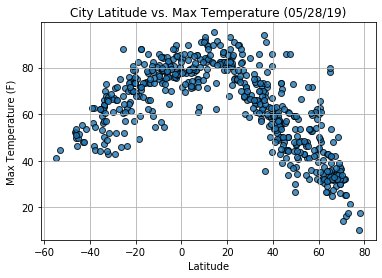

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("01_MaxTemp_Latitude.png")

# Show plot
plt.show()


This scatterplot shows the relationship between latitude and max temp. The southern latitudes (<0) currently have higher max temps on average than the northern latitudes (>0).

#### Latitude vs. Humidity Plot

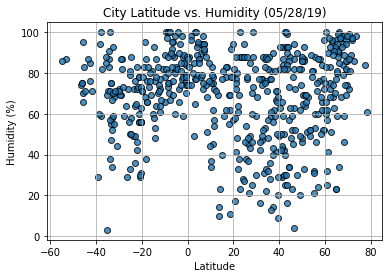

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("02_Humidity_Latitude.png")

# Show plot
plt.show()

This scatterplot is looking at the relationship between latitude and humidity. Majority above the datapoints were above 50%.

#### Latitude vs. Cloudiness Plot

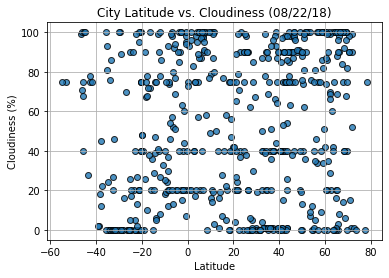

In [9]:

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("03_Cloudiness_Latitude.png")

# Show plot
plt.show()

This scatterplot displays the relationship between latitude and cloudiness. There are plenty of clusters at 0%, 20%, 40%, 75%, 90% (in the norhtern latitudes) and 100%.

#### Latitude vs. Wind Speed Plot

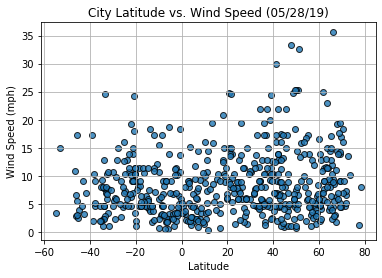

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("04_Windspeed_Latitude.png")

# Show plot
plt.show()


This scatterplot shows the relationship between latitude and wind speed. It looks like the average wind speed is below 15 MPH.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere DataFrames
north_r = weather_data.loc[weather_data["Lat"] >= 0, :]
north_r.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,El Bordo,83,CO,1589148419,80,2.12,-76.98,77.68,2.08
3,Barrow,1,US,1589148420,89,71.29,-156.79,32.00,4.70
4,Xining,36,CN,1589148422,81,36.62,101.77,35.47,1.77
5,Naze,75,JP,1589148423,88,28.37,129.48,71.60,5.82
6,Jinxiang,37,CN,1589148424,88,22.86,115.70,78.44,7.90


In [13]:
#Southern Hemisphere DataFrames

cercy = weather_data.loc[weather_data["Lat"] <= 0, :]
cercy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Broken Hill,0,AU,1589148417,70,-31.95,141.43,42.80,3.36
1,Taltal,26,CL,1589148418,79,-25.40,-70.48,60.55,4.38
7,Cap Malheureux,48,MU,1589148425,71,-19.98,57.61,69.01,1.99
9,Rikitea,5,PF,1589148427,76,-23.12,-134.97,75.94,10.65
10,Buin,0,CL,1589148428,55,-33.73,-70.75,66.20,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

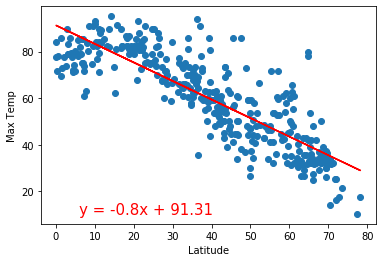

In [19]:
#defines variables
x_values = north_r['Lat']
y_values = north_r['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

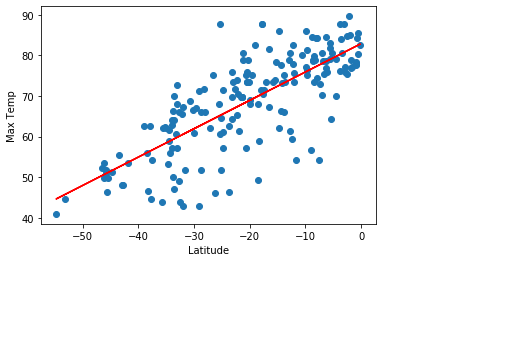

In [20]:
x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

Max Temp vs. Latitude Analysis

There is a very strong negative correlation between Max. Temp and Latitude in the northern hemisphere but a moderate positive correlation in the southern hemispere.
A positive relationship means there is a stronger association between both variables.
A negative, or inverse, relationship means that larger scores on one variable are associated with smaller scores on the other variable.
From the results, the equator has the warmest temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

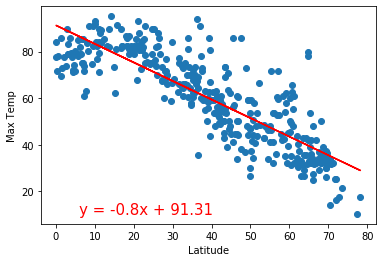

In [16]:
x_values = north_r['Lat']
y_values = north_r['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

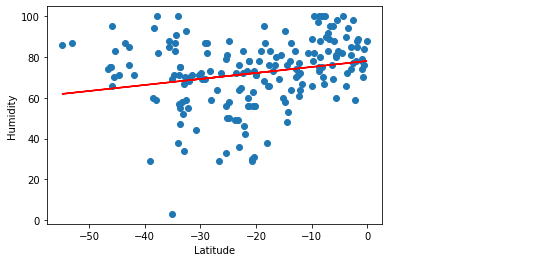

In [21]:
x_values = cercy['Lat']
y_values = cercy['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
x_values = north_r['Lat']
y_values = north_r['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

TypeError: list indices must be integers or slices, not str

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

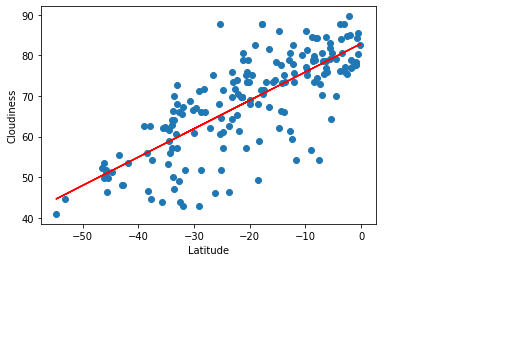

In [24]:

x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:

x_values = north_r['Lat']
y_values = north_r['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

TypeError: list indices must be integers or slices, not str

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

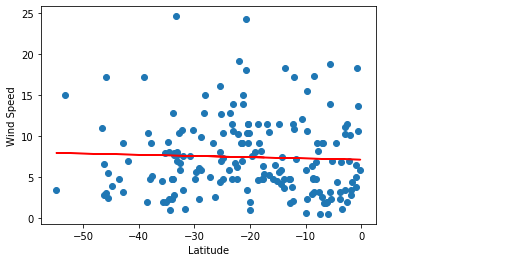

In [28]:
x_values = cercy['Lat']
y_values = cercy['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()